Image Processing
==================

In [1]:
import numpy as np
import scipy.signal as sg
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
from pprint import pprint

from scipy.io import wavfile

sns.set_context("talk")
sns.set_style('white', {'axes.facecolor': 'none'})

/home/boylea/.virtualenvs/dsp/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
def plot(x, y, xlabel='', ylabel=''):
    plt.plot(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    sns.despine()
    ax = plt.gca()
    fig = plt.gcf()
    return ax, fig

In [3]:
def rgb2grey(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    grey = (0.2989 * r) + (0.5870 * g) + (0.1140 * b)
#     grey = (0.3333 * r) + (0.3333 * g) + (0.3333 * b)
    return grey
#     return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1440])


(1836, 3264, 3)
255 0


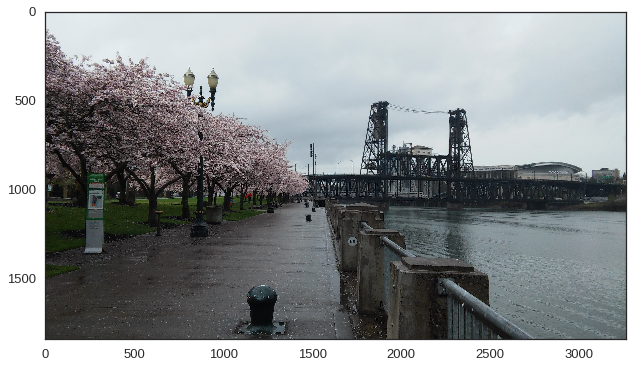

In [67]:
yosam = plt.imread('img/20150314_154733.jpg')
print yosam.shape
print yosam.max(), yosam.min()
plt.imshow(yosam)

0
254


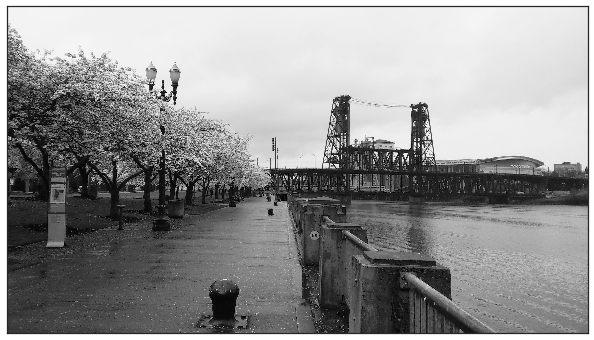

In [68]:
# scaled = yosam*256
scaled=yosam
grey_me = rgb2grey(scaled).astype(int)
print np.amin(grey_me)
print np.amax(grey_me)
plt.imshow(grey_me, cmap=plt.cm.Greys_r)
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
plt.savefig('img/ptown_bw.jpg', bbox_inches='tight', transparent=True)

In [56]:
# flatten the image so we can do indexing on it easier
imshape = grey_me.shape
flat_image = grey_me.flatten()

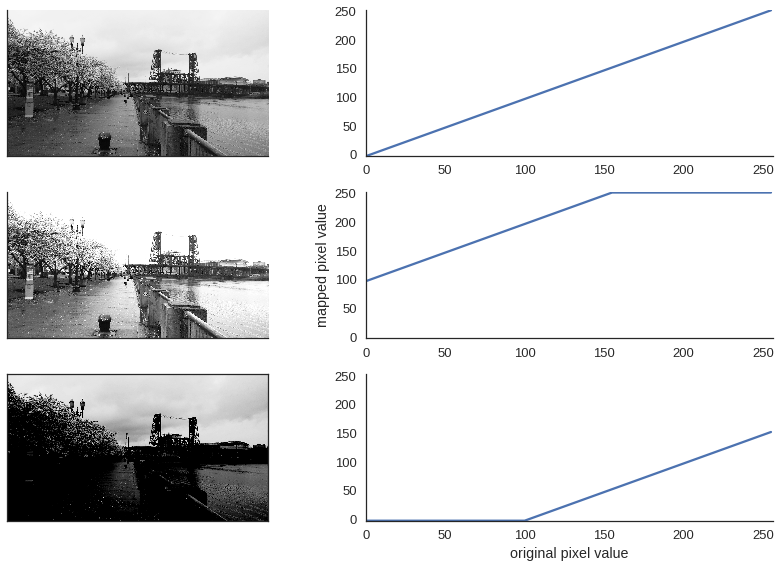

In [57]:
fig = plt.figure(figsize=(12,8))

# unadjusted
plt.subplot(3,2,2)
ax, fig = plot(range(256), range(256), '', '')
plt.ylim((0,256))
plt.xlim((0,256))
plt.subplot(3,2,1)
plt.imshow(grey_me, cmap=plt.cm.Greys_r)
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)

# increase brightness
brighter = np.arange(256)
brighter += 100
brighter[brighter>255] = 255

plt.subplot(3,2,4)
ax, fig = plot(range(256), brighter, '', 'mapped pixel value')
plt.ylim((0,256))
plt.xlim((0,256))

bright_adjusted = brighter[flat_image]
bright_adjusted = bright_adjusted.reshape(*imshape)
plt.subplot(3,2,3)
plt.imshow(bright_adjusted, cmap=plt.cm.Greys_r)
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)

# decrease brightness
darker = np.arange(256)
darker -= 100
darker[darker<0] = 0

plt.subplot(3,2,6)
ax, fig = plot(range(256), darker, 'original pixel value', '')
plt.ylim((0,256))
plt.xlim((0,256))

bright_adjusted = darker[flat_image]
bright_adjusted = bright_adjusted.reshape(*imshape)
plt.subplot(3,2,5)
plt.imshow(bright_adjusted, cmap=plt.cm.Greys_r)
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)

fig.tight_layout()
fig.savefig('img/brightness.png', bbox_inches='tight', transparent=True)

In [58]:
def adjust_contrast(image, factor, brightness):
    contrast_map = np.arange(256)
    contrast_map = (contrast_map * factor) - (brightness * (factor - 1))

    contrast_map[contrast_map > 255] = 255
    contrast_map[contrast_map < 0] = 0
    
    return contrast_map[image], contrast_map
    

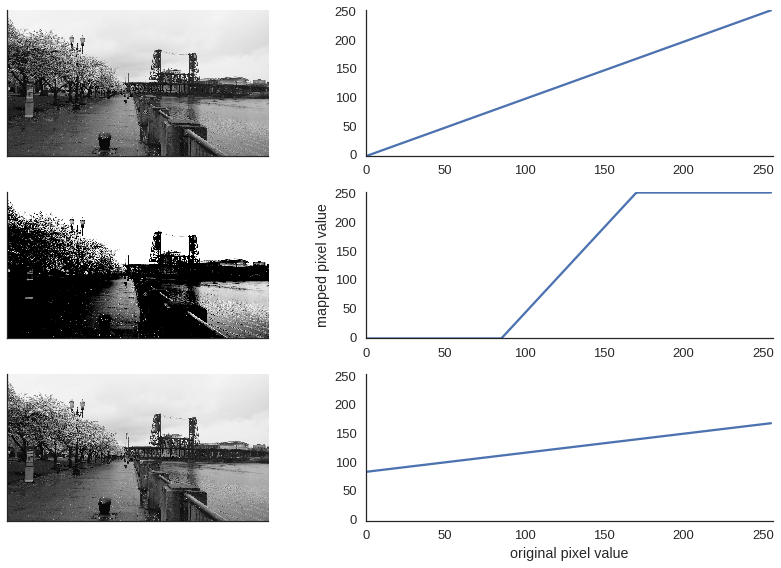

In [59]:
fig = plt.figure(figsize=(12,8))

# unadjusted
plt.subplot(3,2,1)
plt.imshow(grey_me, cmap=plt.cm.Greys_r)
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
plt.subplot(3,2,2)
ax, fig = plot(range(256), range(256), '', '')
plt.ylim((0,256))
plt.xlim((0,256))

# more contrast
adjusted_image, contrast_map = adjust_contrast(flat_image, factor=3, brightness=128)
plt.subplot(3,2,3)
plt.imshow(adjusted_image.reshape(*imshape), cmap=plt.cm.Greys_r)
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
plt.subplot(3,2,4)
ax, fig = plot(range(256), contrast_map, '', 'mapped pixel value')
plt.ylim((0,256))
plt.xlim((0,256))

#less contrast
adjusted_image, contrast_map = adjust_contrast(flat_image, factor=1./3, brightness=128)
plt.subplot(3,2,5)
plt.imshow(adjusted_image.reshape(*imshape), cmap=plt.cm.Greys_r)
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
plt.subplot(3,2,6)
ax, fig = plot(range(256), contrast_map, 'original pixel value', '')
plt.ylim((0,256))
plt.xlim((0,256))

fig.tight_layout()
fig.savefig('img/contrast.png', bbox_inches='tight', transparent=True)

(1836, 3264, 3)
255 0
0
254


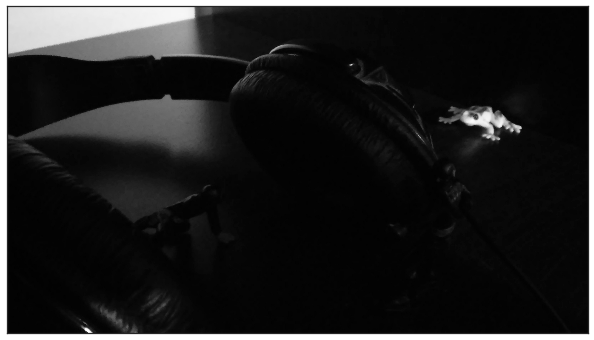

In [60]:
yosam = plt.imread('img/20160210_182856.jpg')
print yosam.shape
print yosam.max(), yosam.min()
# plt.imshow(yosam)

# scaled = yosam*256
scaled=yosam
grey_me = rgb2grey(scaled).astype(int)
print np.amin(grey_me)
print np.amax(grey_me)
plt.imshow(grey_me, cmap=plt.cm.Greys_r)
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
plt.savefig('img/ninja_bw.jpg', bbox_inches='tight', transparent=True)

# flatten the image so we can do indexing on it easier
imshape = grey_me.shape
flat_image = grey_me.flatten()

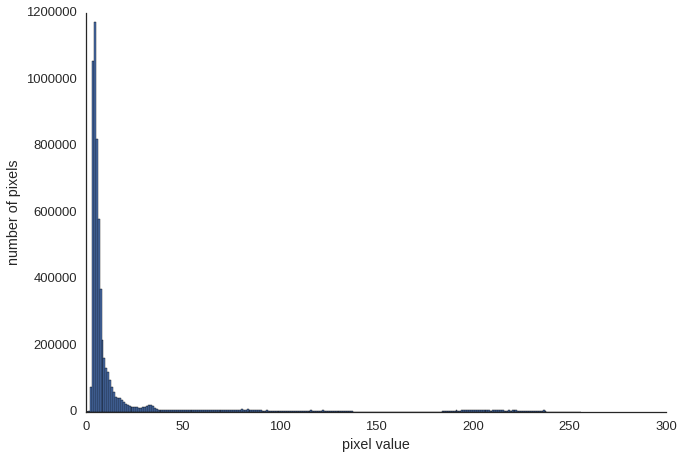

In [61]:
# bins, edges = np.histogram(grey_me[::-1], bins=256, range=(0,256))
# print bins, edges

plt.hist(flat_image, bins=256, range=(0,256));
plt.xlabel('pixel value')
plt.ylabel('number of pixels')
sns.despine()

fig = plt.gcf()
fig.savefig('img/image_histo.png', transparent=True)

In [62]:
bin_counts, bin_numbers = np.histogram(flat_image, bins=256, range=(0,256))
npx = len(flat_image)
histo_map = (np.cumsum(bin_counts)/float(npx))*256
# print bins, edges

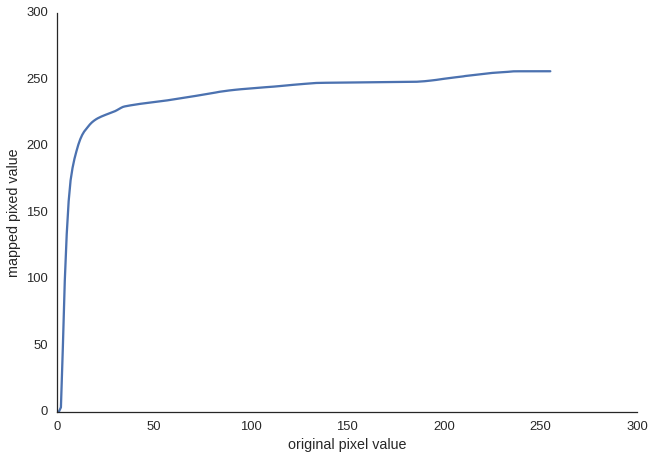

In [63]:
ax, fig = plot(range(256), histo_map, 'original pixel value', 'mapped pixed value')

# plot histogram next to the map first
# plt.subplot()
# plt.hist(flat_image, bins=256, range=(0,256));
# plt.xlabel('pixel value')
# plt.ylabel('number of pixels')
# sns.despine()

fig = plt.gcf()
fig.savefig('img/histo_map.png', transparent=True)

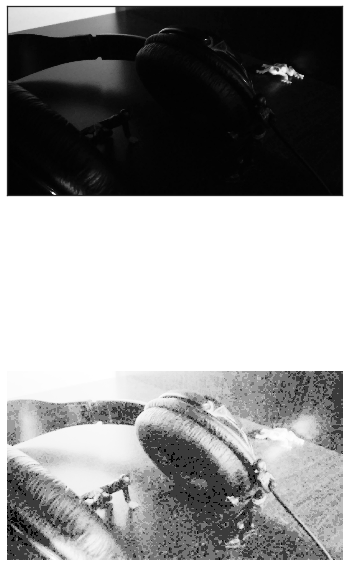

In [64]:
contrast_adjusted = histo_map[flat_image]
contrast_adjusted = contrast_adjusted.reshape(*imshape)

fig = plt.figure(figsize=(6,12))

ax = plt.subplot(2,1,1)
plt.imshow(grey_me, cmap=plt.cm.Greys_r)
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)

ax = plt.subplot(2,1,2)
plt.imshow(contrast_adjusted, cmap=plt.cm.Greys_r)
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)

ax.set_axis_off()
fig.savefig('img/equalized_image.png', bbox_inches='tight', transparent=True)

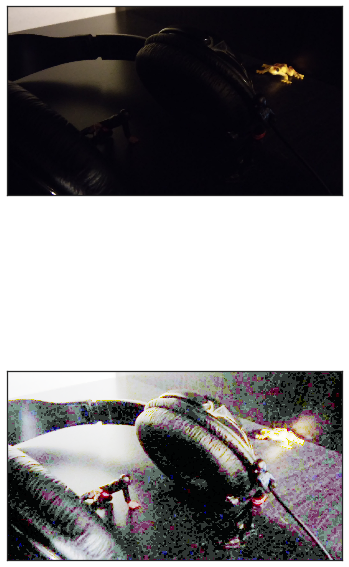

In [65]:
from PIL import Image, ImageOps

fig = plt.figure(figsize=(6,12))
image = Image.open("img/20160210_182856.jpg")
plt.subplot(2,1,1)
plt.imshow(image)
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)

equalized = ImageOps.equalize(image)
plt.subplot(2,1,2)
plt.imshow(equalized)
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)

fig.savefig('img/color_equalization.png', bbox_inches='tight', transparent=True)